In [12]:
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_theme()
sns.set(rc={'figure.figsize':(12,9)})

In [13]:
epoches = 200
y_output, jn_supshock, th_demshok, r_interest, p_inflation =  ([None, ]*epoches, )*5

_sigma, _gamma, _kappa, r_0, p_0 = 0.3, 0.3, 0.3, 2.0, 0
y_output[0], jn_supshock[0], th_demshok[0], r_interest[0], p_inflation[0] = 0.0, 0.0, 0.0, 2.0, 0.0

In [42]:
shock = lambda : np.random.binomial(1, .10) - 2*np.random.binomial(1, .05) + np.random.normal(.0, 2)

In [136]:
from scipy.stats import skewnorm
population = skewnorm.rvs(5, loc=10, scale=30, size=1000)
population = [i for i in population if i > 0][:1000]

<AxesSubplot:ylabel='Count'>

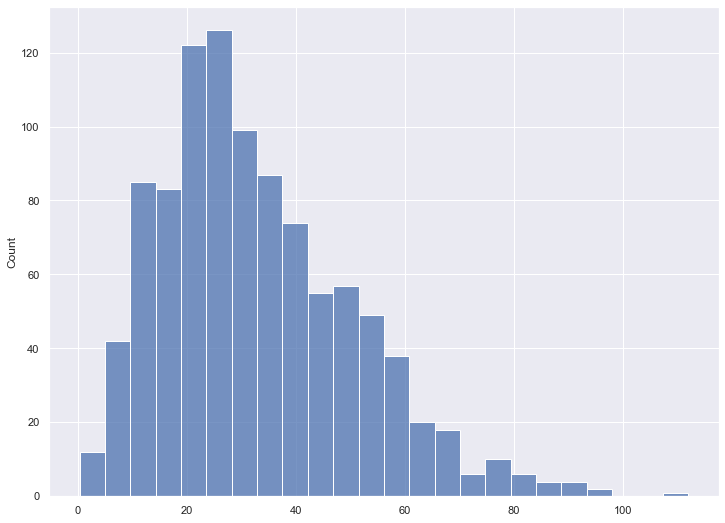

In [137]:
sns.histplot(population)

In [82]:
population.pl

array([ 37.01897419,  28.55763329,  23.76404556,  38.74239093,
        23.12015525,  22.87649888,  13.30751069,  25.27965503,
        15.72467728,  19.22383192,  31.67215371, -10.66217162,
        34.55089082,  33.85247167,  14.28834921,  -2.87139332,
        40.74870388,  14.47711943,  45.25715424,  31.07772404])

In [81]:
len([i for i in population if i < 9])

2

In [35]:
for t in range(1, epoches):

    th_demshok[t] , jn_supshock[t] = shock(), shock()

    p_inflation[t] = p_inflation[t-1] + _kappa * (y_output[t-1] - jn_supshock[t]) # aggregate supply

    r_interest[t] = r_0 + _gamma * (p_inflation[t] - p_0)                   # monetary policy
    y_output[t] = th_demshok[t] - _sigma * (r_interest[t] - r_0)            # investment saving

    # y_output[t] = th_demshok[t] - _sigma * _gamma * (p_inflation[t] - p_0)  # aggregate demand    

In [15]:
df = pd.DataFrame({
    'th_demshok':th_demshok,
'jn_supshock':jn_supshock,
'p_inflation':p_inflation,
'r_interest':r_interest,
'y_output':y_output,
})

In [16]:
y_output


[0.0,
 1.930373827348664,
 2.565847076458672,
 2.5994741842625446,
 2.6781025928281226,
 2.6735171996000515,
 2.6907337371147575,
 2.7075998259824408,
 2.686752869860461,
 2.755112900596639,
 2.712028135777424,
 2.606322357420405,
 2.736730176498759,
 2.8449605032365364,
 2.7600933398932384,
 2.7456465628364275,
 2.7511589100211973,
 2.7544173593995787,
 2.7861240291299807,
 2.764272665501649,
 2.7078748864000173,
 2.660019480423206,
 2.73187357878941,
 2.7718121656659327,
 2.7894839662636115,
 2.775615222589418,
 2.8494619331767987,
 2.7716730507274963,
 2.851311014427064,
 2.767576823270893,
 2.7550207857642124,
 2.638178774126934,
 2.766459616765475,
 2.7706623156998513,
 2.755313366452466,
 2.757839354048836,
 2.736693079978372,
 2.7667715526608556,
 2.7725766596177017,
 2.7122861168348136,
 2.707301955035963,
 2.716178329804855,
 2.734175957762192,
 2.79962987211243,
 2.6604756335870694,
 2.8215479809263333,
 2.7463468682915466,
 2.7912890769641066,
 2.7895863844058226,
 2.7511672

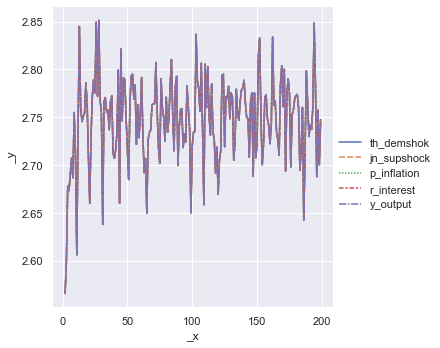

In [20]:
sns.relplot(data=df.loc[2:], kind="line")

In [18]:
df

,th_demshok,jn_supshock,p_inflation,r_interest,y_output
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.930374,1.930374,1.930374,1.930374,1.930374
2,2.565847,2.565847,2.565847,2.565847,2.565847
3,2.599474,2.599474,2.599474,2.599474,2.599474
4,2.678103,2.678103,2.678103,2.678103,2.678103
...,...,...,...,...,...
195,2.785214,2.785214,2.785214,2.785214,2.785214
196,2.687897,2.687897,2.687897,2.687897,2.687897
197,2.757495,2.757495,2.757495,2.757495,2.757495
198,2.700608,2.700608,2.700608,2.700608,2.700608
